In [1]:
# load dataset
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 6s 1us/step


(28, 28)

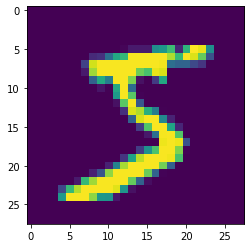

In [2]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])
#check image shape
X_train[0].shape

In [3]:
print(X_train.shape)

(60000, 28, 28)


In [4]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [5]:
# data preprocessing
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

from tensorflow.keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [6]:
# build CNN
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, 
                 activation='relu', input_shape=(28,28,1))) #1st convolution layer + input layer
model.add(Conv2D(32, kernel_size=3, activation='relu')) #2nd convolution layer
model.add(Flatten()) #Flattening
model.add(Dense(16, activation='relu')) #1st hidden layer
model.add(Dense(16, activation='relu')) #2nd hidden layer
model.add(Dense(16, activation='relu')) #3rd hidden layer
model.add(Dense(10, activation='softmax')) #Output layer

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 16)                294928    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 10)                1

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train,
                    validation_split=0.1, epochs=3)

Epoch 1/3
1688/1688 [==============================] - 173s 101ms/step - loss: 1.2897 - accuracy: 0.5407 - val_loss: 0.5197 - val_accuracy: 0.8360
Epoch 2/3
1688/1688 [==============================] - 163s 97ms/step - loss: 0.2181 - accuracy: 0.9385 - val_loss: 0.1014 - val_accuracy: 0.9733
Epoch 3/3
1688/1688 [==============================] - 155s 92ms/step - loss: 0.0954 - accuracy: 0.9731 - val_loss: 0.0990 - val_accuracy: 0.9720


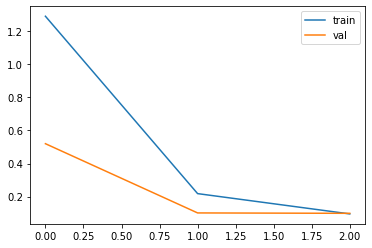

In [10]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()
plt.show()

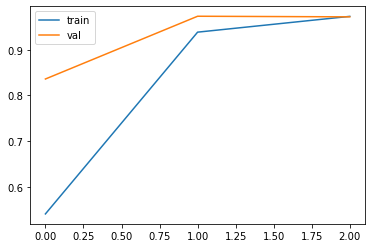

In [11]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()
plt.show()

In [12]:
predicted = model.predict(X_test)
predicted[0]

array([1.73392127e-08, 3.82474683e-16, 1.09645875e-08, 1.82683143e-04,
       8.88315554e-09, 1.49633888e-05, 1.43769103e-11, 9.99795139e-01,
       3.90774790e-09, 7.13316513e-06], dtype=float32)

In [13]:
import numpy as np
print(np.argmax(predicted[0]))
print(np.argmax(y_test[0]))

7
7


In [14]:
pred = np.argmax(predicted,axis=1)
test = np.argmax(y_test,axis=1)

In [15]:
print(pred[:5])
print(test[:5])

[7 2 1 0 4]
[7 2 1 0 4]


In [16]:
correct_indices = np.nonzero(pred == test)[0]

incorrect_indices = np.nonzero(pred != test)[0]

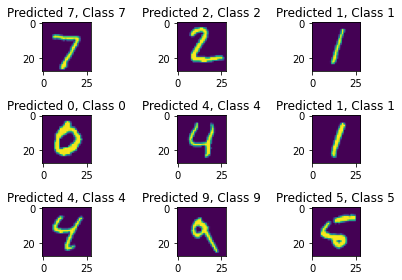

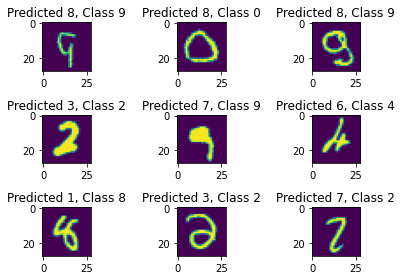

In [17]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct, :, :, 0])
    plt.title("Predicted {}, Class {}".format(pred[correct], test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect, :, :, 0])
    plt.title("Predicted {}, Class {}".format(pred[incorrect], test[incorrect]))
    
plt.tight_layout()